In [4]:
# installing libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


In [5]:
import pandas as pd
# set file path
file_path = r"C:\Users\jilow\Machine_learning_assignment1\Genetic_disorder\train.csv"
# load dataset
data=pd.read_csv(file_path)
print("Dataset head: ", data.head()) # see some of the data

Dataset head:    Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...

In [4]:
print(data.describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  20656.000000            22083.000000  16047.000000  16097.000000   
mean       6.974148                4.898871     34.526454     41.972852   
std        4.319475                0.199663      9.852598     13.035501   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763109     26.000000     31.000000   
50%        7.000000                4.899399     35.000000     42.000000   
75%       11.000000                5.033830     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min 

In [3]:
print("\n Missing values: ", data.isnull().sum())# check missing values


 Missing values:  Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1      

In [14]:
print("\nTarget Variable Distribution:\n")
print(data['Genetic Disorder'].value_counts())


Target Variable Distribution:

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64


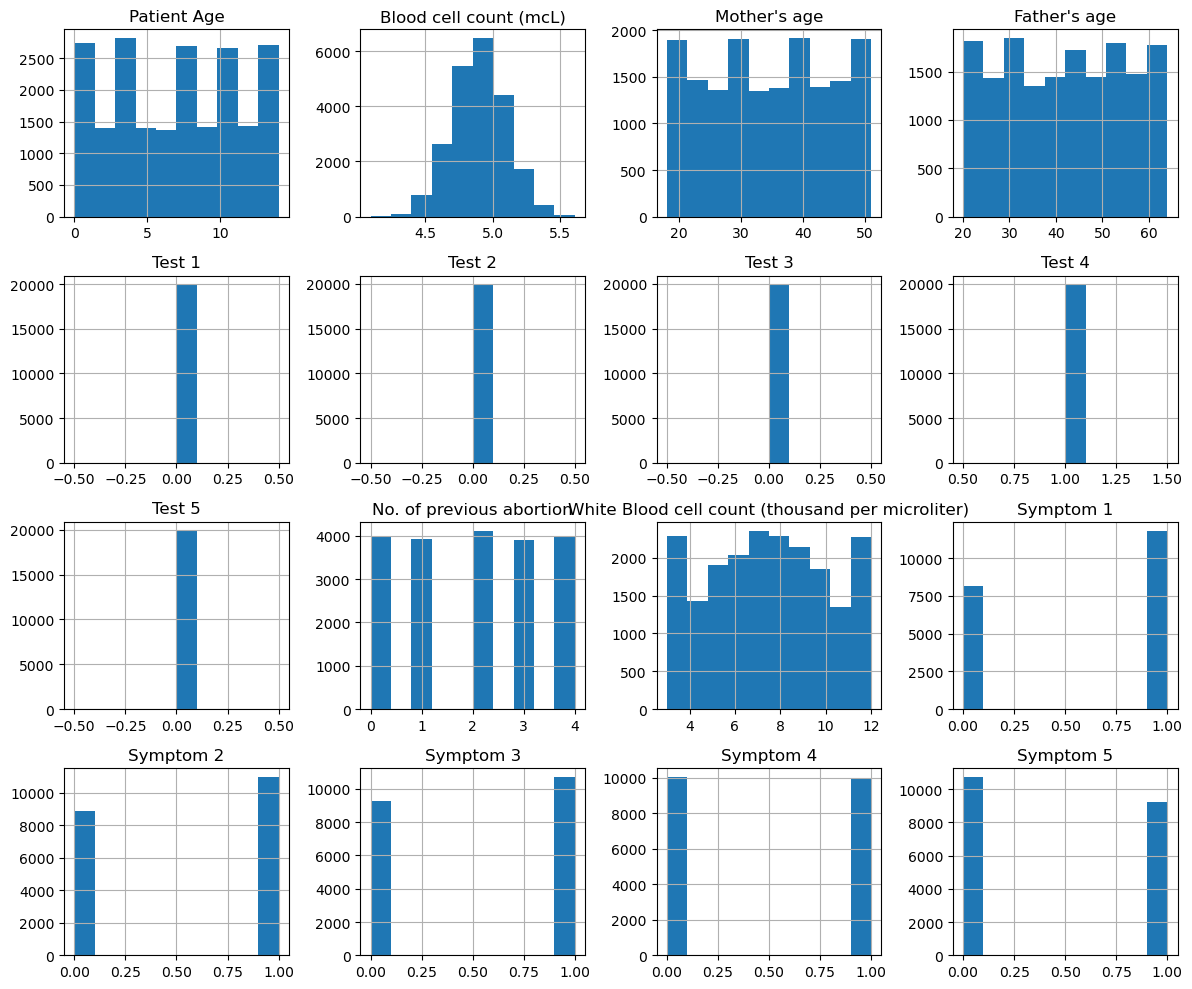

In [10]:
#EDA: understand data distribution of numerical features
import matplotlib.pyplot as plt
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

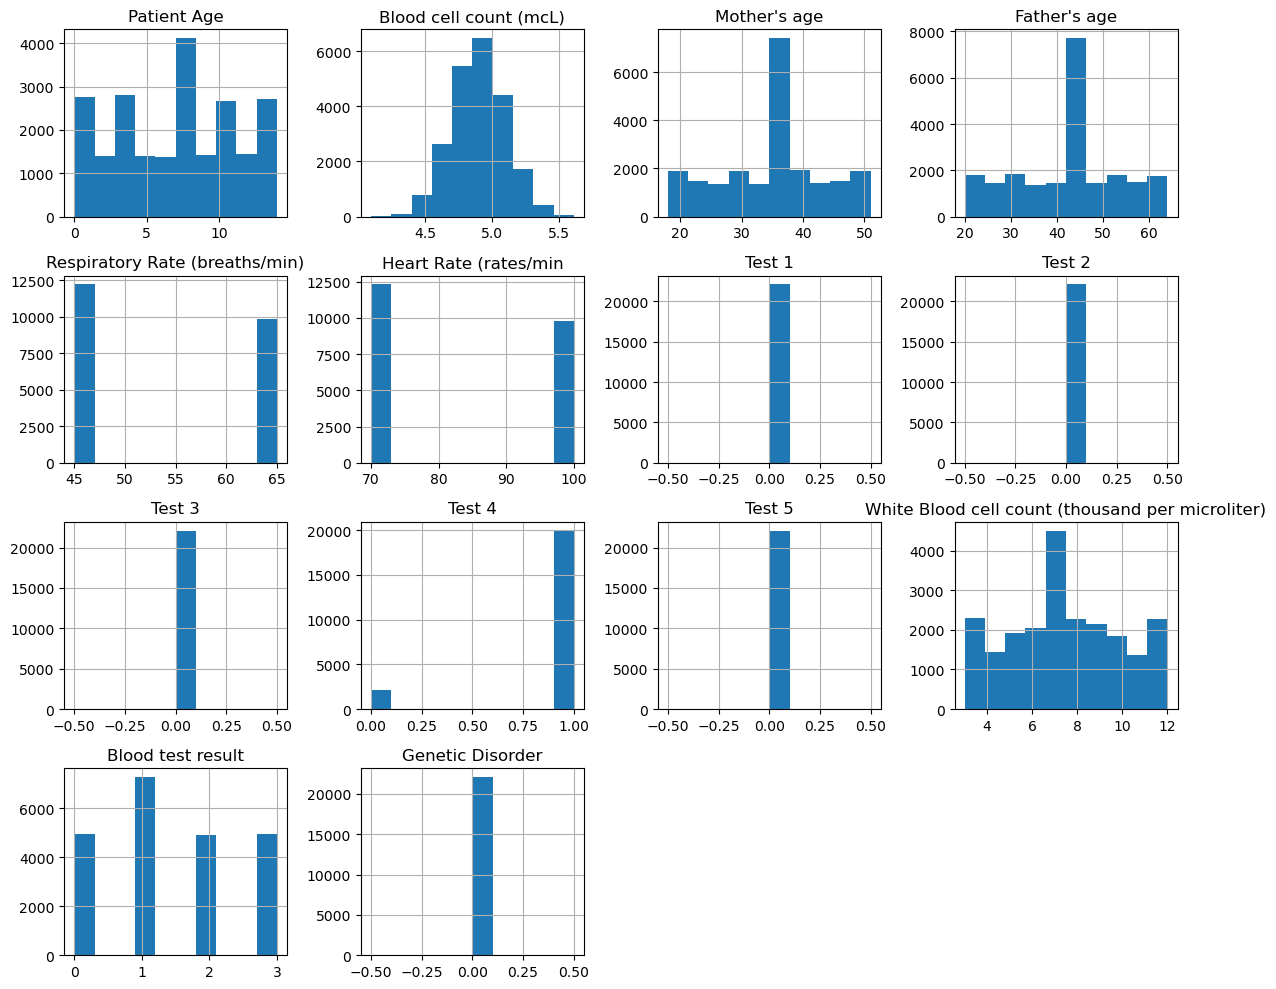

In [40]:
#EDA: understand data distribution of numerical features
import matplotlib.pyplot as plt
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [15]:
# Map target variable to binary values
data['Genetic Disorder'] = data['Genetic Disorder'].apply(
    lambda x: 'Present' if x != 'None' else 'Not Present'
)
print(data['Genetic Disorder'].value_counts())

Present    22083
Name: Genetic Disorder, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
# to encode the binary target
label_encoder=LabelEncoder()
data['Genetic Disorder']=label_encoder.fit_transform(data['Genetic Disorder'])
print("\n Encoded Target Distribution")
print(data['Genetic Disorder'].value_counts())


 Encoded Target Distribution
0    22083
Name: Genetic Disorder, dtype: int64


In [20]:
# Drop non-infomative columns
data.drop(['Patient Id', 'Patient First Name', 'Family Name'], axis=1, inplace=True)

In [21]:
#Fill missing numerical columns with the median
data['Patient Age'].fillna(data['Patient Age'].median(), inplace=True)
data["Mother's age"].fillna(data["Mother's age"].median(), inplace=True)
data["Father's age"].fillna(data["Father's age"].median(), inplace=True)

In [22]:
#Filling missing categorical values(Gender,Birth asphyxia,place of birth) with mode
categorical_cols=['Gender','Birth asphyxia','Place of birth']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [23]:
#Check for missig values again
print("\n Remaining missing values \n")
print(data.isnull().sum())


 Remaining missing values 

Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Te

In [24]:
data['Inherited from father'].fillna(data['Inherited from father'].mode()[0], inplace=True)
data['Maternal gene'].fillna(data['Maternal gene'].mode()[0], inplace=True)

In [25]:
data.drop(['Institute Name', 'Symptom 2', 'Disorder Subclass'], axis=1, inplace=True)

In [36]:
# Fill missing numerical values with the median
num_cols = ['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
            'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
            'White Blood cell count (thousand per microliter)', 'Blood test result']
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [27]:
# Check unique values in each numerical column
for col in num_cols:
    print(f"Unique values in {col}:\n", data[col].unique())


Unique values in Respiratory Rate (breaths/min):
 ['Normal (30-60)' 'Tachypnea' nan]
Unique values in Heart Rate (rates/min:
 ['Normal' 'Tachycardia' nan]
Unique values in Test 1:
 [ 0. nan]
Unique values in Test 2:
 [nan  0.]
Unique values in Test 3:
 [nan  0.]
Unique values in Test 4:
 [ 1. nan]
Unique values in Test 5:
 [ 0. nan]
Unique values in White Blood cell count (thousand per microliter):
 [ 9.85756248  5.52255993         nan ...  7.71546447  8.43767029
 11.18837072]
Unique values in Blood test result:
 [nan 'normal' 'inconclusive' 'slightly abnormal' 'abnormal']


In [30]:
# Map descriptive values to numbers
data['Respiratory Rate (breaths/min)'] = data['Respiratory Rate (breaths/min)'].map({
    'Normal (30-60)': 45,
    'Tachypnea': 65
})
data['Heart Rate (rates/min'] = data['Heart Rate (rates/min'].map({
    'Normal': 70,
    'Tachycardia': 100
})

# Fill missing values with the median
data['Respiratory Rate (breaths/min)'].fillna(data['Respiratory Rate (breaths/min)'].median(), inplace=True)
data['Heart Rate (rates/min'].fillna(data['Heart Rate (rates/min'].median(), inplace=True)

In [31]:
# Fill missing test results with 0
test_cols = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
data[test_cols] = data[test_cols].fillna(0)

In [33]:
# Fill missing values with the median
data['White Blood cell count (thousand per microliter)'].fillna(
    data['White Blood cell count (thousand per microliter)'].median(), inplace=True)

In [34]:
# Map blood test results to ordinal values
blood_test_mapping = {
    'normal': 0,
    'slightly abnormal': 1,
    'abnormal': 2,
    'inconclusive': 3
}
data['Blood test result'] = data['Blood test result'].map(blood_test_mapping)

# Fill missing values with the mode
data['Blood test result'].fillna(data['Blood test result'].mode()[0], inplace=True)


In [35]:
print(data.isnull().sum())


Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                  0
Maternal gene                                          0
Paternal gene                                          0
Blood cell count (mcL)                                 0
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                         0
Heart Rate (rates/min                                  0
Test 1                                                 0
Test 2                                                 0
Test 3                                                 0
Test 4                                                 0
Test 5                         

In [37]:
# Fill missing categorical values with 'Unknown'
categorical_cols = [
    'Parental consent', 'Follow-up', 'Autopsy shows birth defect (if applicable)',
    'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
    'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART',
    'History of anomalies in previous pregnancies', 'Birth defects', 'Symptom 1', 'Symptom 3',
    'Symptom 4', 'Symptom 5'
]
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)


In [38]:
# Drop columns that may not provide significant predictive power
data.drop(['H/O substance abuse', 'No. of previous abortion'], axis=1, inplace=True)


In [42]:
# Verify that all missing values are handled
print("\nRemaining Missing Values:\n")
print(data.isnull().sum())


Remaining Missing Values:

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
